# Lecture 8

**Authors:**
* Yilber Fabian Bautista
* 

**Last date of modification:**
 December 29th 2021

Hello there, 

Welcome to Lecture 8 of this mini-lecture series on programing with Python. In this series, you will learn  basic and intermediate python tools that will be of great use in your scientific carer

**Objectives:** 

By the end of this lecture you will be able to:
* Create, modify, save, and interact with **HDF5** files
* **Fit** curves to a given set of data points using **curve_fit** module in ** scipy.optimize** library

## HDF5 files

See documentation [here](https://docs.h5py.org/en/stable/quick.html).

**HDF** stands for “Hierarchical Data Format”. An HDF5 file contains two kinds of objects: `datasets`, which are **array-like** collections of data, and ` groups`, which are **folder-like** containers that hold datasets and other groups. Schematically, an **HDF5** file looks as follows

<img src="Figures/HDF5_gen.png" width="600" height="400">


Figure taken from [here](https://icmplus.neurosurg.cam.ac.uk/home/icm-features/hdf5-new-icm-data-format/).
The Groups and datasets can be further commentated with **metadata**  contained in associated **Attributes**. We will expand on this bellow. 

The fundamental thing to have in mind when dealing with **HDF5** files is: **Groups** are used  like **dictionaries**, whereas **datasets** work like **NumPy arrays**. 

### Opening  HDF5 files

Let us suppose someone handled us an `HDF5` file and we want to use it. 
First we have to import the `h5py` library in python to manipulate such a file. This is done through the command
```py
import h5py
````
To open our existing `HDF5` file we have two options:

 * The syntax for the first one is:

```py
f = h5py.File('myfile.hdf5','r')
# Do something

f.close()

```
Here the `close()` attribute closes the `HDF5` file if no longer needed. 

* The second option is via a `with` block:

```py
with h5py.File('myfile.hdf5', 'r') as f:
    # Do something
        
```
For this second method, to close the  `HDF5` file we just need to leave the `with` block.

The keyword `r` stands for `read`, which means we can only read but not modify the `HDF5` file. In the next table we can see other keywords commonly used when dealing with data files. We will use some of them bellow
<img src="Figures/rwa.png" width="600" height="400">


Let us make the discussion more precise with the following example:

We are handled the `mytestfile.hdf5` file and we want to access all the information contained inside it. We start by opening the file using the ` h5py` library

In [1]:
import h5py

# Open a hdf5 file
f = h5py.File('mytestfile.hdf5','r')

# Close the file if no longer needed
#f.close()

### Keys of a HDF5 file

Likewise for dictionaries,  we can as for the set of keys contained in the file if not known beforehand, using the attribute `keys()`: 
```py
f.keys()
```
which will produce the output
```py
<KeysViewHDF5 ['mydataset', 'mygroup']>
```
This means our `HDF5` file has two objects labeled by the keys `'mydataset'` and  `'mygroup'`. In principle they can correspond to either **datasets** or **groups** of our `HDF5` file. 

### Accessing a group or data set 
To explicitly know the nature of the two keys in our example, we need to call our file `f` with the specific key using an dictionary-like syntax:
```py
f['mydataset']
```
with output 

```py
<HDF5 dataset "mydataset": shape (20,), type "<i4">
```
Therefore,  `"mydataset"` indeed corresponds to a **dataset** in the `HDF5` file. It is a row vector with 20 entries, whose elements are  integers. 

We can do the same for the remaining key
```py
f['mygroup']
```
with output 
```py
<HDF5 group "/mygroup" (1 members)>
```
This means that `mygroup` corresponds instead to a **group** in our  `HDF5` file, and hosts another element which can be either a **dataset** or a **group**. Recall **groups** are like **dictionaries**, and therefore, the logic to access the keys for the elements contained in the group is the same,  that is, by using the `key()` attribute. 
```py
f['mygroup'].keys()
```
with output 
```py
<KeysViewHDF5 ['newdataset']>
```

In [2]:
# Try it yourself

### Accessing the information in a dataset 

Now that we know how to ask for the keys in a `HDF5` file, and access the groups and datasets inside them, we want to be able to use the information stored in the datasets themselves. Recall **datasets** are like **np.arrays**, and therefore we can use all of the numpy machinery on them. Let us see that with the dataset contained in `'mydataset'` keyword in our previous example

In [3]:
data = f['mydataset']
data[:]

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95], dtype=int32)

We can for instance slice the array,
```py
data[2:-3]
```
or even plot it

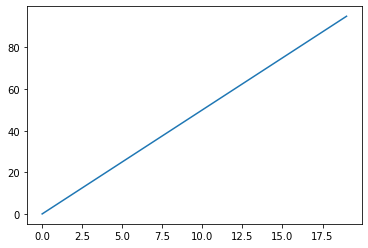

In [4]:
import matplotlib.pyplot as plt 
plt.plot(data)

Similarly, one  can now ask how to access the dataset contained in the group `'mygroup'`. For that we have several options:
* By assigning a new variable to `f['mygroup']`, and then accessing `'newdataset'` using it as a keyword
```py
grp = f['mygroup']
dset = grp['newdataset']
dset
```
with output 

```py
<HDF5 dataset "newdataset": shape (), type "<f8">
```
That means that `dset` is a scalar (shape() array), and therefore to access it we use the syntax
```py
dset[()]
```
which will produce as output the float number `50.0`

In [5]:
# Try it yourself

* We avoid too many variable assignation we can simply use repeated indexing
```py
dset = f['mygroup']['newdataset']
```
which will have the same effect. 

* To avoid too many square brackets we can simply use a path-like argument:
```py
dset = f['/mygroup/newdataset'][()]
dset
```
where we have already  accessed the scalar element, getting as output the number `50.0`.  This is the path specification for Mac and Linux. For windows you will probably have to use
```py
dset = f['\\mygroup\\newdataset'][()]
dset
```


In [6]:
#try it yourself

We then see that it is very simple to navigate through the `HDF5` file by using keyword arguments. 

### Attributes of  groups and data sets
The last element to explore in our `HDF5` file is to ask for the **Metadata** stored in **attributes** of the `HDF5` file itself, groups and datasets.  For that we use the `.attrs` proxy. See [documentation](https://docs.h5py.org/en/stable/high/attr.html#h5py.AttributeManager.keys). Let us see for instance if our `HDF5` has attribute keywords:

In [7]:
f.attrs.keys()

<KeysViewHDF5 []>

the output is an empty list meaning that the file itself does not have attribute keywords. We can ask the same for the groups and datasets

In [8]:
f['mygroup'].attrs.keys()

<KeysViewHDF5 ['new_atribute']>

in this case, the group itself has an attribute given by the keyword `'new_atribute'`. We can access its content in the usual indexing-like form

In [9]:
f['mygroup'].attrs['new_atribute']

1.0

As we see, the attribute just has assigned the integer value 10.  You can check that the datasets do not have any attribute by using the same logic
```py
f['mygroup/newdataset'].attrs.keys()
```
and 
```
f['mydataset'].attrs.keys()
```
both of which produce as output an empty list.

Attributes have the following properties as specified in the [documentation](https://docs.h5py.org/en/stable/high/attr.html#h5py.AttributeManager.keys)

* They may be created from any scalar or NumPy array
* Each attribute should be small (generally < 64k)
* There is no partial I/O (i.e. slicing); the entire attribute must be read.

### Closing the `HDF5` file

Once we finish using the file we can simply close it using the `close()` attribute. 

In [10]:
f.close()

# Exercise 1
Repeat the all the above discussion but opening the file using a `with` block. Hint: use the `'r'` argument, and recall indentation is important.  `print` statements are also useful.

## Creating an HDF5 file

We might now wonder how was `mytestfile.hdf5` file created. We simply used the following code:
```py
import h5py
import numpy as np

with h5py.File('mytestfile.hdf5', 'w') as g:
 
    dset = g.create_dataset("mydataset", (20,),data = np.arange(0,100,5), dtype='i')
    grp2 = g.create_group('mygroup')
    dset2 = grp2.create_dataset("newdataset", data = 50.)
    grp2.attrs['new_atribute'] = 1.0
```
which we will proceed to explain in detail. 

1. The first step is of course to create the datafile with the given name, in this case `mytestfile.hdf5`, and use the `'w'` (write) keyword, as indicated in the table above. We create the file under the alias `g`. Up to here, a new `HDF5` file will be created in the same location of our notebook. (To specify a particular location we use the path for it. example: `with h5py.File('Documents/my_files/Explore/.../mytestfile.hdf5', 'w') as g` ). The newly created file will be an empty file which we then proceed to fill with **groups** and **datasets**

2. In the first indented line ` dset = g.create_dataset("mydataset", (20,),data = np.arange(0,100,5), dtype='i')` we have created a new dataset, whose keyword is `"mydataset"`. It contain a vector with 20 entries, given by the `20` elements of the array `np.arange(0,100,5)`. We further specified the data type using the ` dtype` keyword.  
3. In the second line `grp2 = g.create_group('mygroup')`, we simply added a new group, as clearly indicated by the syntax. 
4. In the next line we have added a new dataset to our existing group, where now the data corresponds to a scalar object
5. Finally we assigned the attribute `'new_atribute'` with value `1.0`, to the existing **group**. 

And that's it! 

# Exercise 2
Create your own `HDF5` file including groups, datasets and attributes. 

## Modifying an existing `HDF5` file

In lecture 5 we learned how to modify `csv` files using **pandas** library. Existing `HDF5` files can also be modified. Let us see how this work with an specific example. 

First let us create a new `HDF5` file example

In [11]:
import h5py
import numpy as np

with h5py.File('test_file.hdf5', 'w') as t:
    dat = np.random.random((5,5))
    dset = t.create_dataset("rand2d",data = dat)

Let us now open it using the `r+` keyword, which stands for read and write, as shown explicitly in our table above. 

In [12]:
test  = h5py.File('test_file.hdf5','r+')

# To see we are able to use our file, let us for instance print the values contained in our dataset  
print('Dataset rand2d: ', test['rand2d'][:])

# Let us now for instance add a group into our existing file, a data set in that group, and an additional subgroup
new_group = test.create_group('test_group')
new_sub_group = new_group.create_group('test_sub_group')
new_dset = new_group.create_dataset("geom_space",data = np.geomspace(1,100,10))

# Check that the group was added correctly by, for instance, checking the keys  
print()
print('keys after adding test_group and : ' , test.keys())

# And access our `'geom_space'` dataset
print()
print('geom_space data', test['test_group/geom_space'][:])

#Close the file
test.close()

Dataset rand2d:  [[0.47610252 0.23023273 0.53979862 0.01829433 0.34084732]
 [0.42974482 0.04934831 0.98256308 0.36474703 0.81524263]
 [0.37827485 0.80130219 0.34946348 0.69914303 0.11102094]
 [0.6082653  0.72182051 0.53642673 0.34298772 0.256363  ]
 [0.17682778 0.21832867 0.70403728 0.78400669 0.13679967]]

keys after adding test_group and :  <KeysViewHDF5 ['rand2d', 'test_group']>

geom_space data [  1.           1.66810054   2.7825594    4.64158883   7.74263683
  12.91549665  21.5443469   35.93813664  59.94842503 100.        ]


Finally we check that our original `'test_file.hdf5'` file has saved all the changes made above by opening it using the `r` mode.

In [13]:
with h5py.File('test_file.hdf5','r') as t2:
    print('keys', t2.keys())
    print()
    print('geom_space_data',  t2['test_group/geom_space'][:])

keys <KeysViewHDF5 ['rand2d', 'test_group']>

geom_space_data [  1.           1.66810054   2.7825594    4.64158883   7.74263683
  12.91549665  21.5443469   35.93813664  59.94842503 100.        ]


One has to be careful when modifying `HDF5` files, since datasets added using already existing keywords as names, will overwrite the existing datasets. Similarly, `HDF5` files created with names of files already existing, will overwrite the existing files. 

Notice we have  interchangeably manipulate `HDF5` using or not the `with` blocks, to show the equivalence of the different ways of handle data files. 

# Example

The <a href="https://wwwmpa.mpa-garching.mpg.de/auriga/"> Auriga project  </a>   provided us with the  data file <code>  'halo_1_DMO.hdf5' </code> which contains   a set of  simulated Dark Matter (DM) particles placed between 4-15 kpc in a dark matter-only halo. In the data set,  we have access to  the particles' <code> 'Coordinates' (x, y, z in kpc) </code> ,  <code> 'Mass' (in Solar masses) </code>, and  <code> 'Velocities' (vx, vy, vz in km/s) </code> . In this example, and Exercise 3 bellow, we aim to learn some properties of the DM halo described by this data file. 

Let us start by loading the data file 

In [14]:
halo  = h5py.File('old tutorials/Tutorial 2/halo_1_DMO.hdf5','r')

We can access the keys in the file if unknown by using multiple times the `key()` attribute. Let us access the particles cartesian positions as follows:


In [15]:
positions = halo['DarkMatter/Coordinates'] # if using windows, the paths need to be modifed accordingly
x = positions[:,0]
y = positions[:,1]
z = positions[:,2]

We can for instance plot the DM positions, it is convenient to use the `s = ...` keyword to vary the size of the points in a scatter plot

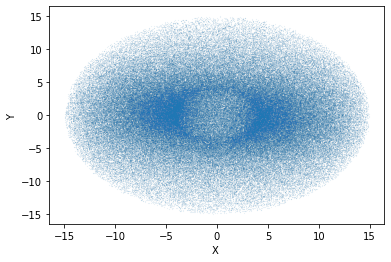

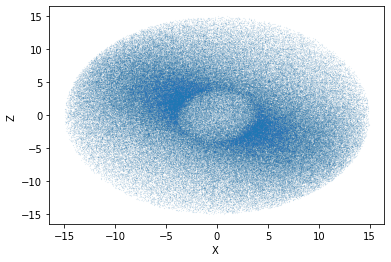

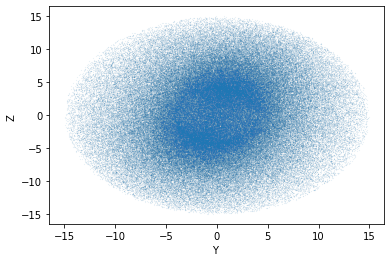

In [16]:
# x vs y plot
plt.scatter(x,y, s=0.001)
plt.xlabel("X ")
plt.ylabel("Y ")
plt.show()

# x vs z plot
plt.scatter(x,z, s=0.001)
plt.xlabel("X ")
plt.ylabel("Z ")
plt.show()

# y vs z plot
plt.scatter(y,z, s=0.001)
plt.xlabel("Y ")
plt.ylabel("Z ")
plt.show()

### Density profile from  simulations
We are now interested in knowing the DM density distribution assuming a spherically symmetric halo. In practice we will  calculate the density from the summed mass of particles within, for instance,  logarithmically-spaced spherical shells. Since all DM particles have the same mass, the DM density in between two given shells separated by a distance  $\Delta r_i= r_{i+1}-r_i$,  can be computed from 
$$
\rho_i  = \frac{m N_i}{4/3\pi(r_{i+1}^3-r_{i}^3)},  
$$
where  $N_i$ is the total number of particles contained in between the two shells. 

To compute $N_i$ we need  first to compute all the radial positions for our particles from  the norm of the position vector $$r_i= \left|\vec{r}_i\right|= \sqrt{x_i^2+y_i^2+z_i^2} .$$ Then we can count how many particles are there in between shells, using a histogram.  

Since datasets behave like **Numpy arrays**, we can use all the numpy machinery. 

In [17]:
# compute the radial positions of DM particles in the halo
r = np.sqrt(np.sum(positions[:]**2, axis=1))

Let us now  compute the number of particles in between two shells, using. First we need to define the radial bins (shells separations) to be used. As we mentioned, we will use logarithmically spaced shells. The largest and smallest shells will be position at the  min and max values in the radial positions for our DM particles respectively. 

In [18]:
r_bins  = np.geomspace(min(r),max(r),100)

each bin,  `r_bins[i+1]-r_bins[i]` for $i\le len(\text{r_bins})$, corresponds to the distance $\Delta r_i$ between  two concentric spherical shells.

To do the histogram we use the [histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) function in the `numpy` library

In [19]:
N, r_bin_h =  np.histogram(r, bins = r_bins)

Here, `N` give the number of DM particles, in a given radial bin `r_bin` (Notice `r_bins = r_bin_h`). However, we have to notice that `len(N)=99` whereas `len(r_bins)=100`. Then we need to compute the bins centers, which are `99` instead of `1000`. They  are  simply given by

In [20]:
# Bins centers
r_bin_c = np.array([(r_bins[i+1] + r_bins[i])/2 for i in np.arange(len(r_bins)-1)])

Let us further plot our counts as function of the bins centers

<BarContainer object of 99 artists>

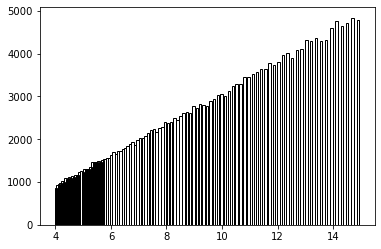

In [21]:
plt.bar(r_bin_c,N,fill=False, width=0.09)

The last ingredient to compute the DM density distribution is the particles  mass, which we extract from our `halo` file as follows

In [22]:
m = halo['DarkMatter/Mass'][0]
m

353725.33898061706

We now have all the elements needed to compute the DM mass density

In [23]:
rho = np.array([m*N[i]/(4/3*np.pi*(r_bins[i+1]**3-r_bins[i]**3)) for i in range(len(N))])

In a plot, the DM distribution as function of the  bins centers is

Text(0, 0.5, 'rho [M_s/kpc^3] ')

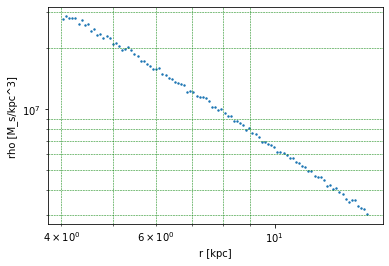

In [24]:
plt.scatter(r_bin_c,rho, s=2)
plt.xscale('log')
plt.yscale('log')
plt.grid(which="minor",color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel("r [kpc]")
plt.ylabel("rho [M_s/kpc^3] ")

# Curve fitting

The next task is to obtain an analytic expression, $\rho(r)$, that best describes the behaviour for the DM density as function of the radial position observed in the curve above. For that, we use **curve fitting**. 

As name indicates,  **curve fitting** is the process of finding the curve that best describes a series of data points. We will use the [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function given in  the `scipy` library. The curve fitting process can be split in the following steps:
1. Collect the data
2. Define objective function (The function that probably will describe well the data. It has free parameters that can be fixed from the fit)
3. Do the fit
4. Compute the goodness of the fit

#### 1.  Collect the data
We did step 1. in our previous analysis and have the data `(rho,r_bin_c)` ready to be used. 

#### 2. Objective function
Spherical DM density distributions are known to be well fitted by a universal function known as the NFW (Navarro, Frenk and White) density profile. See for instance [here](https://en.wikipedia.org/wiki/Navarro%E2%80%93Frenk%E2%80%93White_profile). It has the analytic form

$$
\rho(r) =  \frac{\rho_s}{r/r_s(1+r/r_s)^2},
$$
where $\rho_s$ and $r_s$ are two halo dependent parameters. Notice that $\rho(r) \to  \rho_s \frac{r_s}{r}, $ as $r\to 0 $. This is known as a cuspy profile and has discrepancy with observations of dwarf galaxies (See for instance this [review](https://arxiv.org/pdf/1705.02358.pdf)). 

Let us define our objective function

In [25]:
def rho_obj(r, r_s, rho_s):
    return rho_s/(r/r_s)/(1+r/r_s)**2
    

#### 3. Doing the fit

This is a very simple step, we just need to import the `curve_fit` module from the `scipy` library. The syntax for using the function is the following:
```py
curve_fit(f,xdata,ydata,p0=None,sigma=None,)  
 ```
where `f` is the objective function, `p0` is an initial guess for the free parameters (if non specified, the default value is `p0={1}`), and `sigma` are the uncertainties in the data (`xdata` and `ydata`). Our histogram  has uncertainties in it, given by the Poisson errors $\sim \sqrt{N}$

Then, the uncertainty in $\rho$ is simply 
$$
\sigma_\rho = \frac{m \sqrt{N_i}}{4/3\pi(r_{i+1}^3-r_{i}^3)}
$$
Let us first compute those uncertainties.

In [26]:
sigma_rho = np.array([m*np.sqrt(N[i])/(4/3*np.pi*(r_bins[i+1]**3-r_bins[i]**3)) for i in range(len(N))])

The  `curve_fit` function   will return the values for the parameters  that best fit the curve, and the [covariance](https://en.wikipedia.org/wiki/Covariance_matrix) matrix.
That is, the parameters that  minimize the $\chi^2$ function, defined by $$\chi_n^2=\sum_{i=1}^n\left(\frac{y_i-f(x_i,p_0)}{\sigma_{y_i}}\right)^2,$$
where $f(x_i,p_0)$ is the objective function evaluated at the $i$-position, with parameters $p_0$. $y_i$ are the data points, whose uncertainties are denoted by  $\sigma_{y_i}$.


It is well known that $\chi_n^2$ typical values are $$\frac{\chi_n^2}{\text{dof}}\approx 1,$$  where dof is the number of degrees of freedom, defined by $$\text{ dof} = n-\text{len}(p_0).$$

Then, $\chi_n ^2\gg n$ signals a  bad fit, whereas  $\chi_n^2 \ll n$ indicates that the error bar in the data are wrongly computed.

In [27]:
from scipy.optimize import curve_fit

In [28]:
# Do the fit
par, c_matrix = curve_fit(rho_obj,r_bin_c,rho, sigma = sigma_rho )
#extract the fit parameters
r_s,rho_s = par
print('The fit parameters are: '"rho_s = ",rho_s,", r_s =", r_s)

The fit parameters are: rho_s =  14016518.826516252 , r_s = 13.884494659397033


Let us plot our findings and compare them to the data

The fitted NFW parameters are: rho_s =  14016518.826516252 M_s/kpc^3 , and r_s = 13.884494659397033 kpc


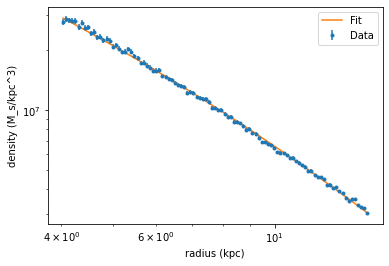

In [29]:
#Fitted function
rho_fit =  rho_obj(r_bin_c,r_s, rho_s)

#plot
plt.errorbar(r_bin_c,rho,yerr=sigma_rho,label ="Data",linestyle="None",fmt='.')
plt.xscale('log')
plt.yscale('log')
plt.loglog(r_bin_c,rho_fit ,label = "Fit")
plt.xlabel('radius (kpc)')
plt.ylabel('density (M_s/kpc^3)')
plt.legend(loc="upper right")
print('The fitted NFW parameters are: '"rho_s = ",rho_s,'M_s/kpc^3',", and r_s =", r_s, 'kpc')
plt.show()

#### Goodness of the fit

The goodness of the fit is given by the $\chi^2$ function. As already indicated, for a good fit we expect to have a $\chi^2\sim \text{dof}$. Let us explicitly check this 

In [30]:
def chi_s(y,y_fit,dy):
    """chi_square function"""
    return sum(((y-y_fit)/dy)**2)

applied to our example we have

In [31]:
chis = chi_s(rho,rho_fit,sigma_rho)

Now let us compare it to the number of degrees of freedom 

In [32]:
dof = len(rho) - len(par)
print(chis / dof)

1.2134560290753849
